In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [42]:
df1 = pd.read_csv("Unemployment_in_India.csv")
df2 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [43]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                  

In [44]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [45]:
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [83]:
df2.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [46]:
df1.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [47]:
df1.dropna()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [48]:
#updating the column values
df1.columns = ['state', 'Date', 'Frequency', 'unemployment_rate',
       'employed', 'labour_participation_rate',
       'Area']

In [49]:
df1.head()

,state,Date,Frequency,unemployment_rate,employed,labour_participation_rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [54]:
df1['Date'] = pd.to_datetime(df1['Date'])

Statewise Analysis

In [57]:

state_analysis = df1.groupby('state')[['unemployment_rate', 'labour_participation_rate']].mean()


In [58]:
!pip install seaborn


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 293.3/293.3 kB 1.1 MB/s eta 0:00:00


In [61]:
import seaborn as sns

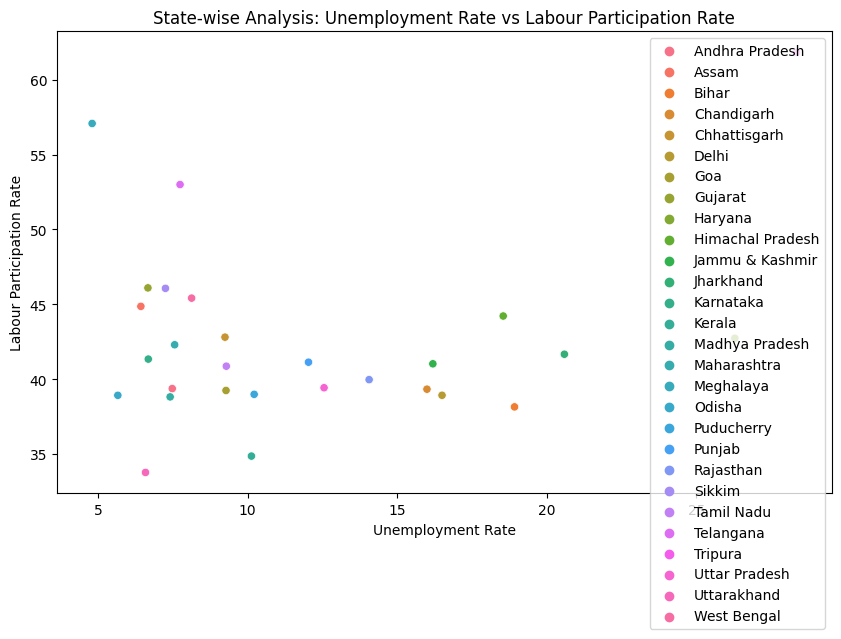

In [62]:
# Comparison scatter plot of Unemployment Rate and Labour Participation Rate by State
plt.figure(figsize=(10, 6))
sns.scatterplot(x='unemployment_rate', y='labour_participation_rate', data=state_analysis, hue=state_analysis.index)
plt.xlabel('Unemployment Rate')
plt.ylabel('Labour Participation Rate')
plt.title('State-wise Analysis: Unemployment Rate vs Labour Participation Rate')
plt.legend(loc='upper right')
plt.show()

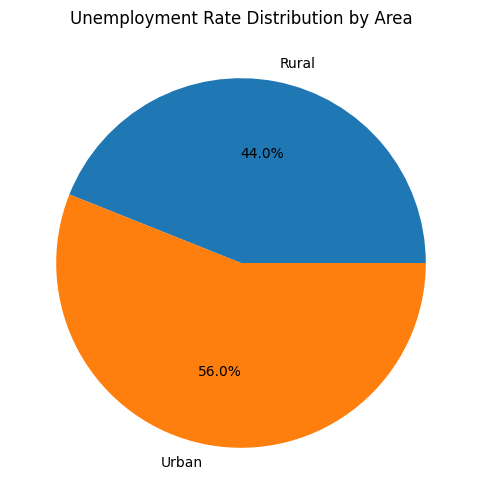

In [63]:
# Pie chart of Unemployment Rate distribution by Area
area_analysis = df1.groupby('Area')['unemployment_rate'].mean()

plt.figure(figsize=(8, 6))
plt.pie(area_analysis, labels=area_analysis.index, autopct='%1.1f%%')
plt.title('Unemployment Rate Distribution by Area')
plt.show()

<Figure size 1200x800 with 0 Axes>

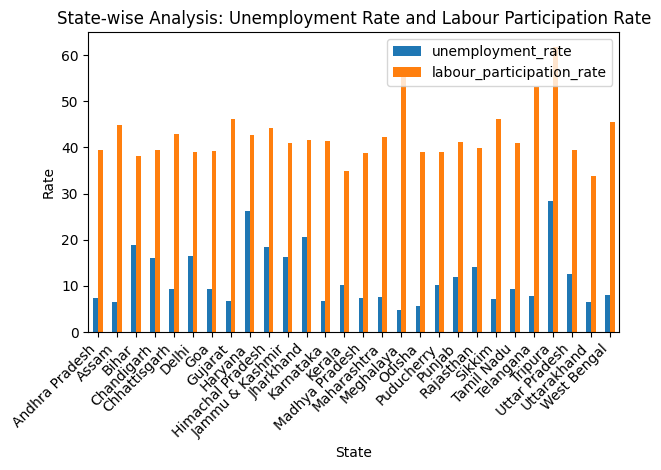

In [72]:
# Bar graph comparison of Unemployment Rate and Labour Participation Rate by State
plt.figure(figsize=(12, 8))
state_analysis.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Rate')
plt.title('State-wise Analysis: Unemployment Rate and Labour Participation Rate')
plt.xticks(rotation=45, ha = 'right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

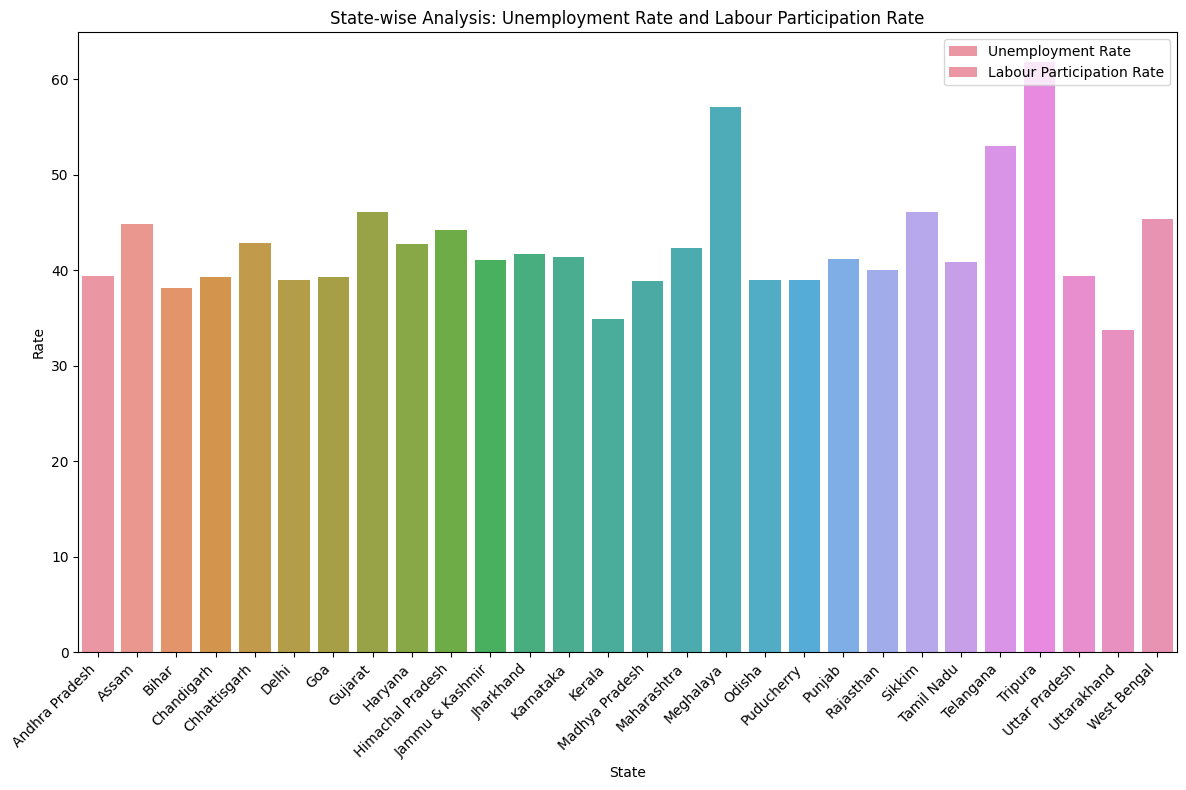

In [65]:
# Bar graph comparison of Unemployment Rate and Labour Participation Rate by State
plt.figure(figsize=(12, 8))
sns.barplot(x=state_analysis.index, y='unemployment_rate', data=state_analysis, label='Unemployment Rate')
sns.barplot(x=state_analysis.index, y='labour_participation_rate', data=state_analysis, label='Labour Participation Rate')
plt.xlabel('State')
plt.ylabel('Rate')
plt.title('State-wise Analysis: Unemployment Rate and Labour Participation Rate')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

Date-wise analysis

In [78]:
# Group the data by Date and calculate the average Unemployment Rate and Labour Participation Rate
date_analysis = df1.groupby('Date')[['unemployment_rate', 'labour_participation_rate']].mean()

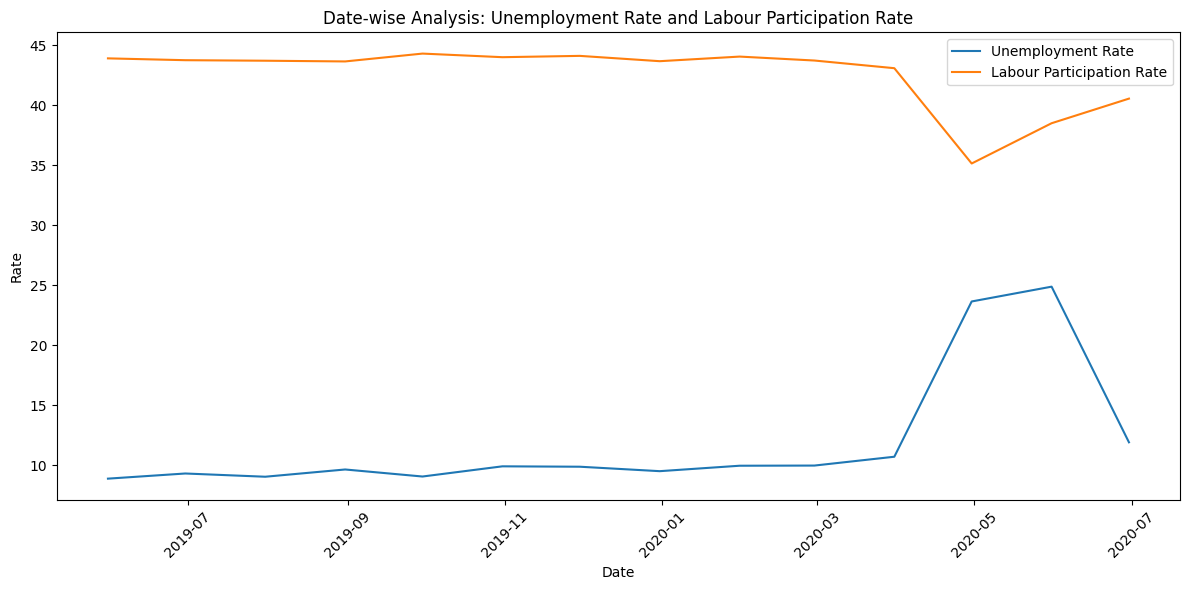

In [79]:
# Line plot of Date-wise Unemployment Rate and Labour Participation Rate
plt.figure(figsize=(12, 6))
plt.plot(date_analysis.index, date_analysis['unemployment_rate'], label='Unemployment Rate')
plt.plot(date_analysis.index, date_analysis['labour_participation_rate'], label='Labour Participation Rate')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('Date-wise Analysis: Unemployment Rate and Labour Participation Rate')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

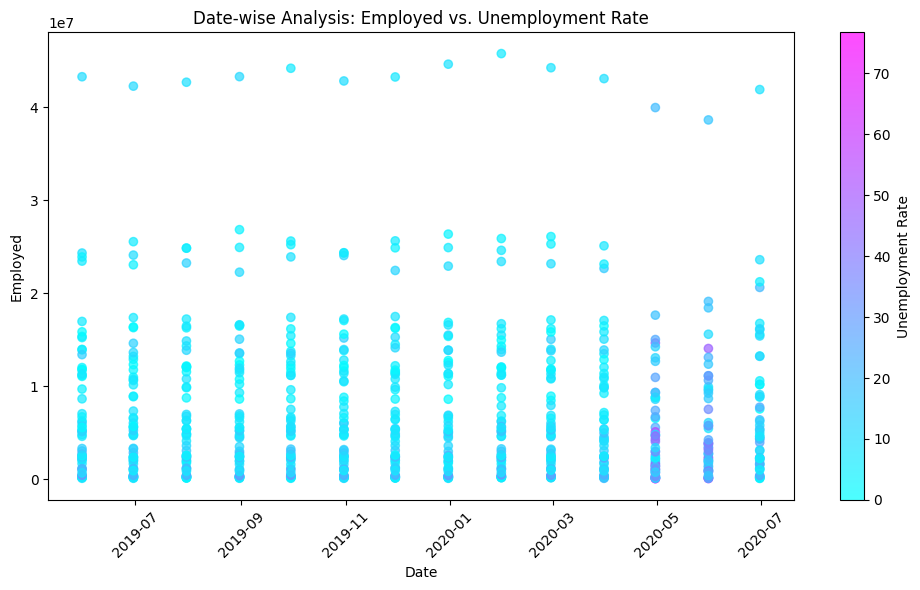

In [82]:
# Scatter plot of Date-wise Employed vs. Unemployment Rate
plt.figure(figsize=(10, 6))
plt.scatter(df1['Date'], df1['employed'], c=df1['unemployment_rate'], cmap='cool', alpha=0.7)
plt.colorbar(label='Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Employed')
plt.title('Date-wise Analysis: Employed vs. Unemployment Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

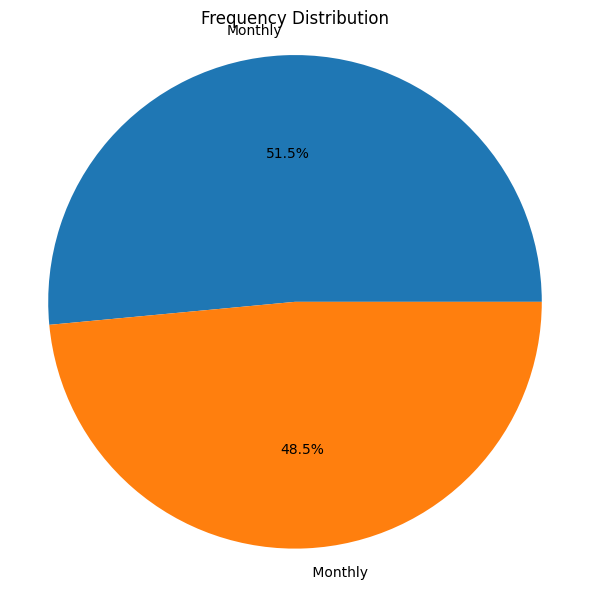

In [85]:
# Group the data by Frequency and count the occurrences
frequency_distribution = df1['Frequency'].value_counts()

# Pie chart of Frequency Distribution
plt.figure(figsize=(6, 6))
plt.pie(frequency_distribution, labels=frequency_distribution.index, autopct='%1.1f%%')
plt.title('Frequency Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()